In [2]:
# !pip install opencv-python==4.6.0.66 scikit-image==0.19.3

In [3]:
from matplotlib import pyplot as plt
from pathlib import Path

import numpy as np

import cv2
from skimage import io

def imshow(np_img, size=(10, 10), is_gray=False):
    plt.figure(figsize=size)
    if is_gray:
        plt.imshow(np_img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(np_img)
    plt.show()

In [4]:
data_dir = Path('assets')
assert data_dir.exists()

In [5]:
img = cv2.cvtColor(io.imread(data_dir / 'text3.jpg'), cv2.COLOR_BGR2RGB)
width = int(img.shape[1] * 2)
height = int(img.shape[0] * 2)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
# img = cv2.resize(img, (0,0)) 

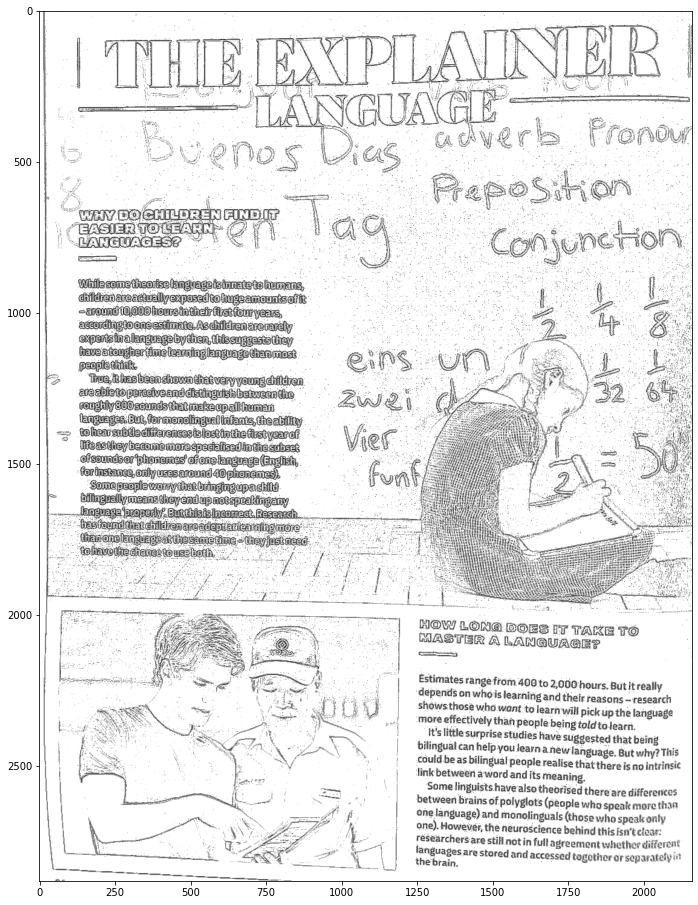

In [6]:
grayscaled = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

threshold = cv2.adaptiveThreshold(grayscaled, 255,
                          cv2.BORDER_REPLICATE,
                          cv2.THRESH_BINARY_INV, 5, 5)

retval, birnary_threshold = cv2.threshold(threshold, 0, 255, cv2.THRESH_BINARY)

flipped_color = cv2.bitwise_not(birnary_threshold)

imshow(flipped_color, (16, 16), True)

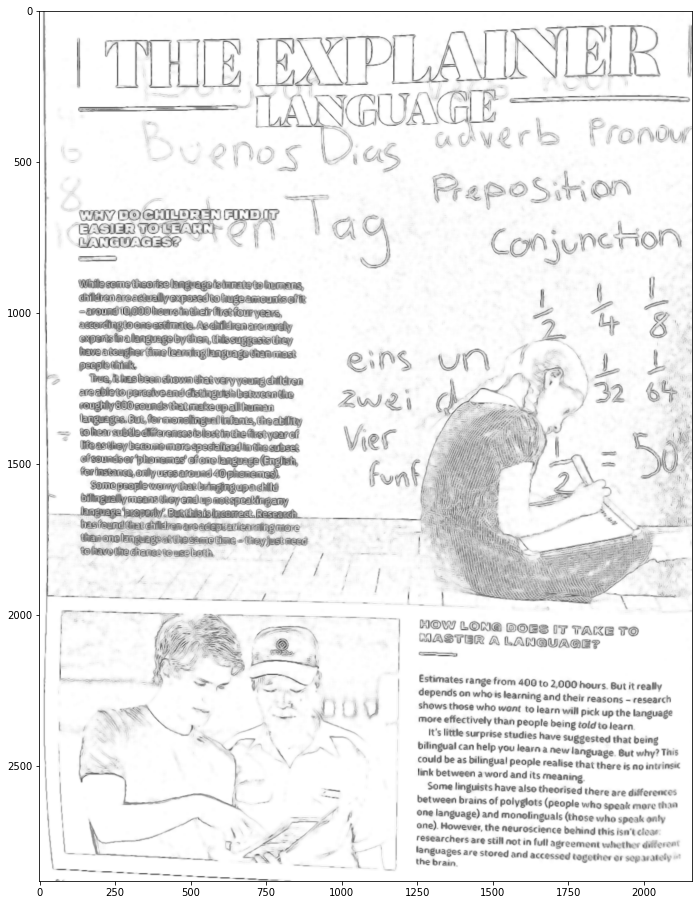

In [7]:
denoised = cv2.fastNlMeansDenoising(flipped_color,None,80,7,15)
imshow(denoised, (16,16), True)

In [85]:
rect=cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# dilation = cv2.dilate(blured,rect,iterations = 1)
dilation = cv2.erode(denoised,rect,iterations = 7)

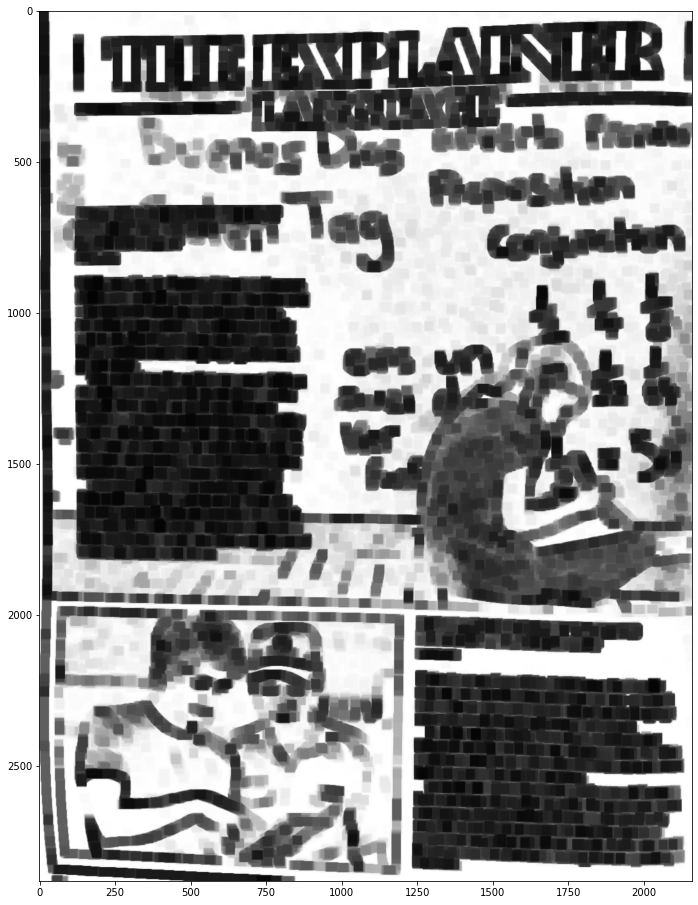

In [86]:
imshow(dilation, (16, 16), True)

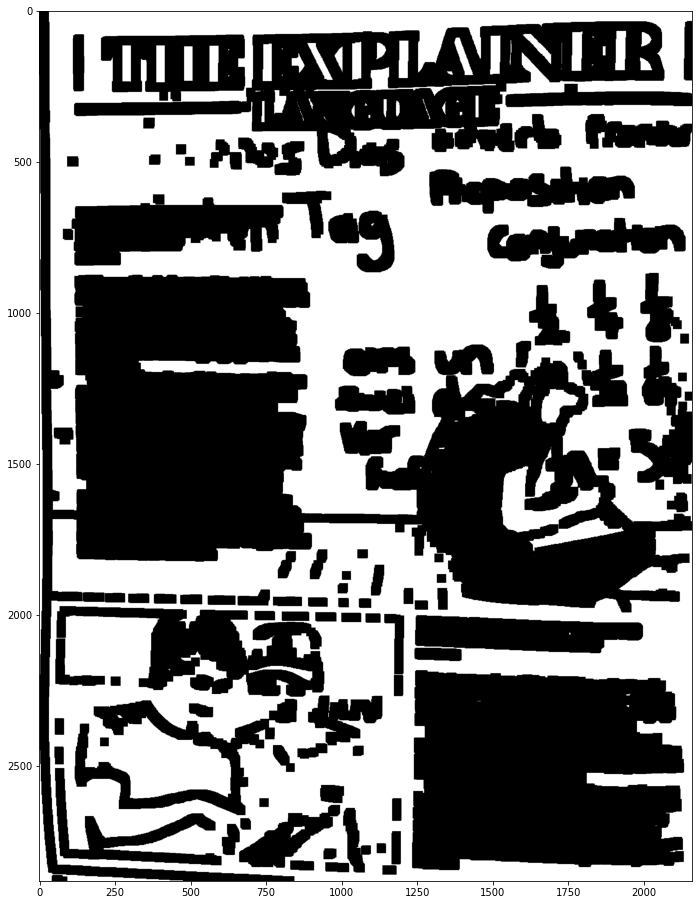

In [87]:
_, dilation_thresholded = cv2.threshold(dilation, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(dilation_thresholded, (16, 16), True)